## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Data understanding


In [1073]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error, mean_squared_error

%matplotlib inline

In [1074]:
# Loading the dataset
data = pd.read_csv("./data/kc_house_data.csv")

# Checking the columns in the dataset
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [1075]:
# Selecting relevant columns for our analysis
df = data[['price', 'bedrooms', 'sqft_living', 'bathrooms', 'yr_built', 'floors', 'waterfront', 'condition', 'grade', 'sqft_lot']].copy()
df.head()

,price,bedrooms,sqft_living,bathrooms,yr_built,floors,waterfront,condition,grade,sqft_lot
0,221900.0,3,1180,1.00,1955,1.0,NaN,Average,7 Average,5650
1,538000.0,3,2570,2.25,1951,2.0,NO,Average,7 Average,7242
2,180000.0,2,770,1.00,1933,1.0,NO,Average,6 Low Average,10000
3,604000.0,4,1960,3.00,1965,1.0,NO,Very Good,7 Average,5000
4,510000.0,3,1680,2.00,1987,1.0,NO,Average,8 Good,8080


In [1076]:
df.shape

(21597, 10)

In [1077]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   sqft_living  21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   yr_built     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   waterfront   19221 non-null  object 
 7   condition    21597 non-null  object 
 8   grade        21597 non-null  object 
 9   sqft_lot     21597 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 1.6+ MB


In [1078]:
df.describe()

,price,bedrooms,sqft_living,bathrooms,yr_built,floors,sqft_lot
count,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,5.402966e+05,3.373200,2080.321850,2.115826,1970.999676,1.494096,1.509941e+04
std,3.673681e+05,0.926299,918.106125,0.768984,29.375234,0.539683,4.141264e+04
min,7.800000e+04,1.000000,370.000000,0.500000,1900.000000,1.000000,5.200000e+02
25%,3.220000e+05,3.000000,1430.000000,1.750000,1951.000000,1.000000,5.040000e+03
50%,4.500000e+05,3.000000,1910.000000,2.250000,1975.000000,1.500000,7.618000e+03
75%,6.450000e+05,4.000000,2550.000000,2.500000,1997.000000,2.000000,1.068500e+04
max,7.700000e+06,33.000000,13540.000000,8.000000,2015.000000,3.500000,1.651359e+06


# Data cleaning

### Dropping Na

In [1079]:
# Dropping null values
df.dropna(subset='waterfront', inplace=True)
df.head()

,price,bedrooms,sqft_living,bathrooms,yr_built,floors,waterfront,condition,grade,sqft_lot
1,538000.0,3,2570,2.25,1951,2.0,NO,Average,7 Average,7242
2,180000.0,2,770,1.00,1933,1.0,NO,Average,6 Low Average,10000
3,604000.0,4,1960,3.00,1965,1.0,NO,Very Good,7 Average,5000
4,510000.0,3,1680,2.00,1987,1.0,NO,Average,8 Good,8080
5,1230000.0,4,5420,4.50,2001,1.0,NO,Average,11 Excellent,101930


In [1080]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19221 entries, 1 to 21596
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        19221 non-null  float64
 1   bedrooms     19221 non-null  int64  
 2   sqft_living  19221 non-null  int64  
 3   bathrooms    19221 non-null  float64
 4   yr_built     19221 non-null  int64  
 5   floors       19221 non-null  float64
 6   waterfront   19221 non-null  object 
 7   condition    19221 non-null  object 
 8   grade        19221 non-null  object 
 9   sqft_lot     19221 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 1.6+ MB


In [1081]:
df.shape

(19221, 10)

In [1082]:
# Checking for duplicate data
def check_duplicates(column):
    return column.duplicated().value_counts()

dups = check_duplicates(df)
dups


False    19214
True         7
Name: count, dtype: int64

In [1083]:
# Dropping duplicate rows
df = df.drop_duplicates()

In [1084]:
df.shape

(19214, 10)

In [1085]:
df.describe()

,price,bedrooms,sqft_living,bathrooms,yr_built,floors,sqft_lot
count,1.921400e+04,19214.000000,19214.000000,19214.000000,19214.000000,19214.000000,1.921400e+04
mean,5.416541e+05,3.374727,2082.544082,2.117011,1971.025398,1.494743,1.507845e+04
std,3.723068e+05,0.928562,922.659386,0.769691,29.380196,0.539974,4.082398e+04
min,7.800000e+04,1.000000,370.000000,0.500000,1900.000000,1.000000,5.200000e+02
25%,3.220000e+05,3.000000,1430.000000,1.750000,1951.000000,1.000000,5.043000e+03
50%,4.500000e+05,3.000000,1920.000000,2.250000,1975.000000,1.500000,7.620000e+03
75%,6.448750e+05,4.000000,2550.000000,2.500000,1997.000000,2.000000,1.072000e+04
max,7.700000e+06,33.000000,13540.000000,8.000000,2015.000000,3.500000,1.651359e+06


### Outliers

In [1086]:
# Checking values in 'bedrooms' columns
df['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33], dtype=int64)

In [1087]:
# Removing outliers
df = df[df['bedrooms'] != 33]
df['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10], dtype=int64)

In [1088]:
# Checking th number of rows and columns after data cleaning
df.shape

(19213, 10)

# Data analysis

In [1089]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19213 entries, 1 to 21596
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        19213 non-null  float64
 1   bedrooms     19213 non-null  int64  
 2   sqft_living  19213 non-null  int64  
 3   bathrooms    19213 non-null  float64
 4   yr_built     19213 non-null  int64  
 5   floors       19213 non-null  float64
 6   waterfront   19213 non-null  object 
 7   condition    19213 non-null  object 
 8   grade        19213 non-null  object 
 9   sqft_lot     19213 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 1.6+ MB


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'sqft_living'}>],
       [<Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'floors'}>],
       [<Axes: title={'center': 'sqft_lot'}>, <Axes: >, <Axes: >]],
      dtype=object)

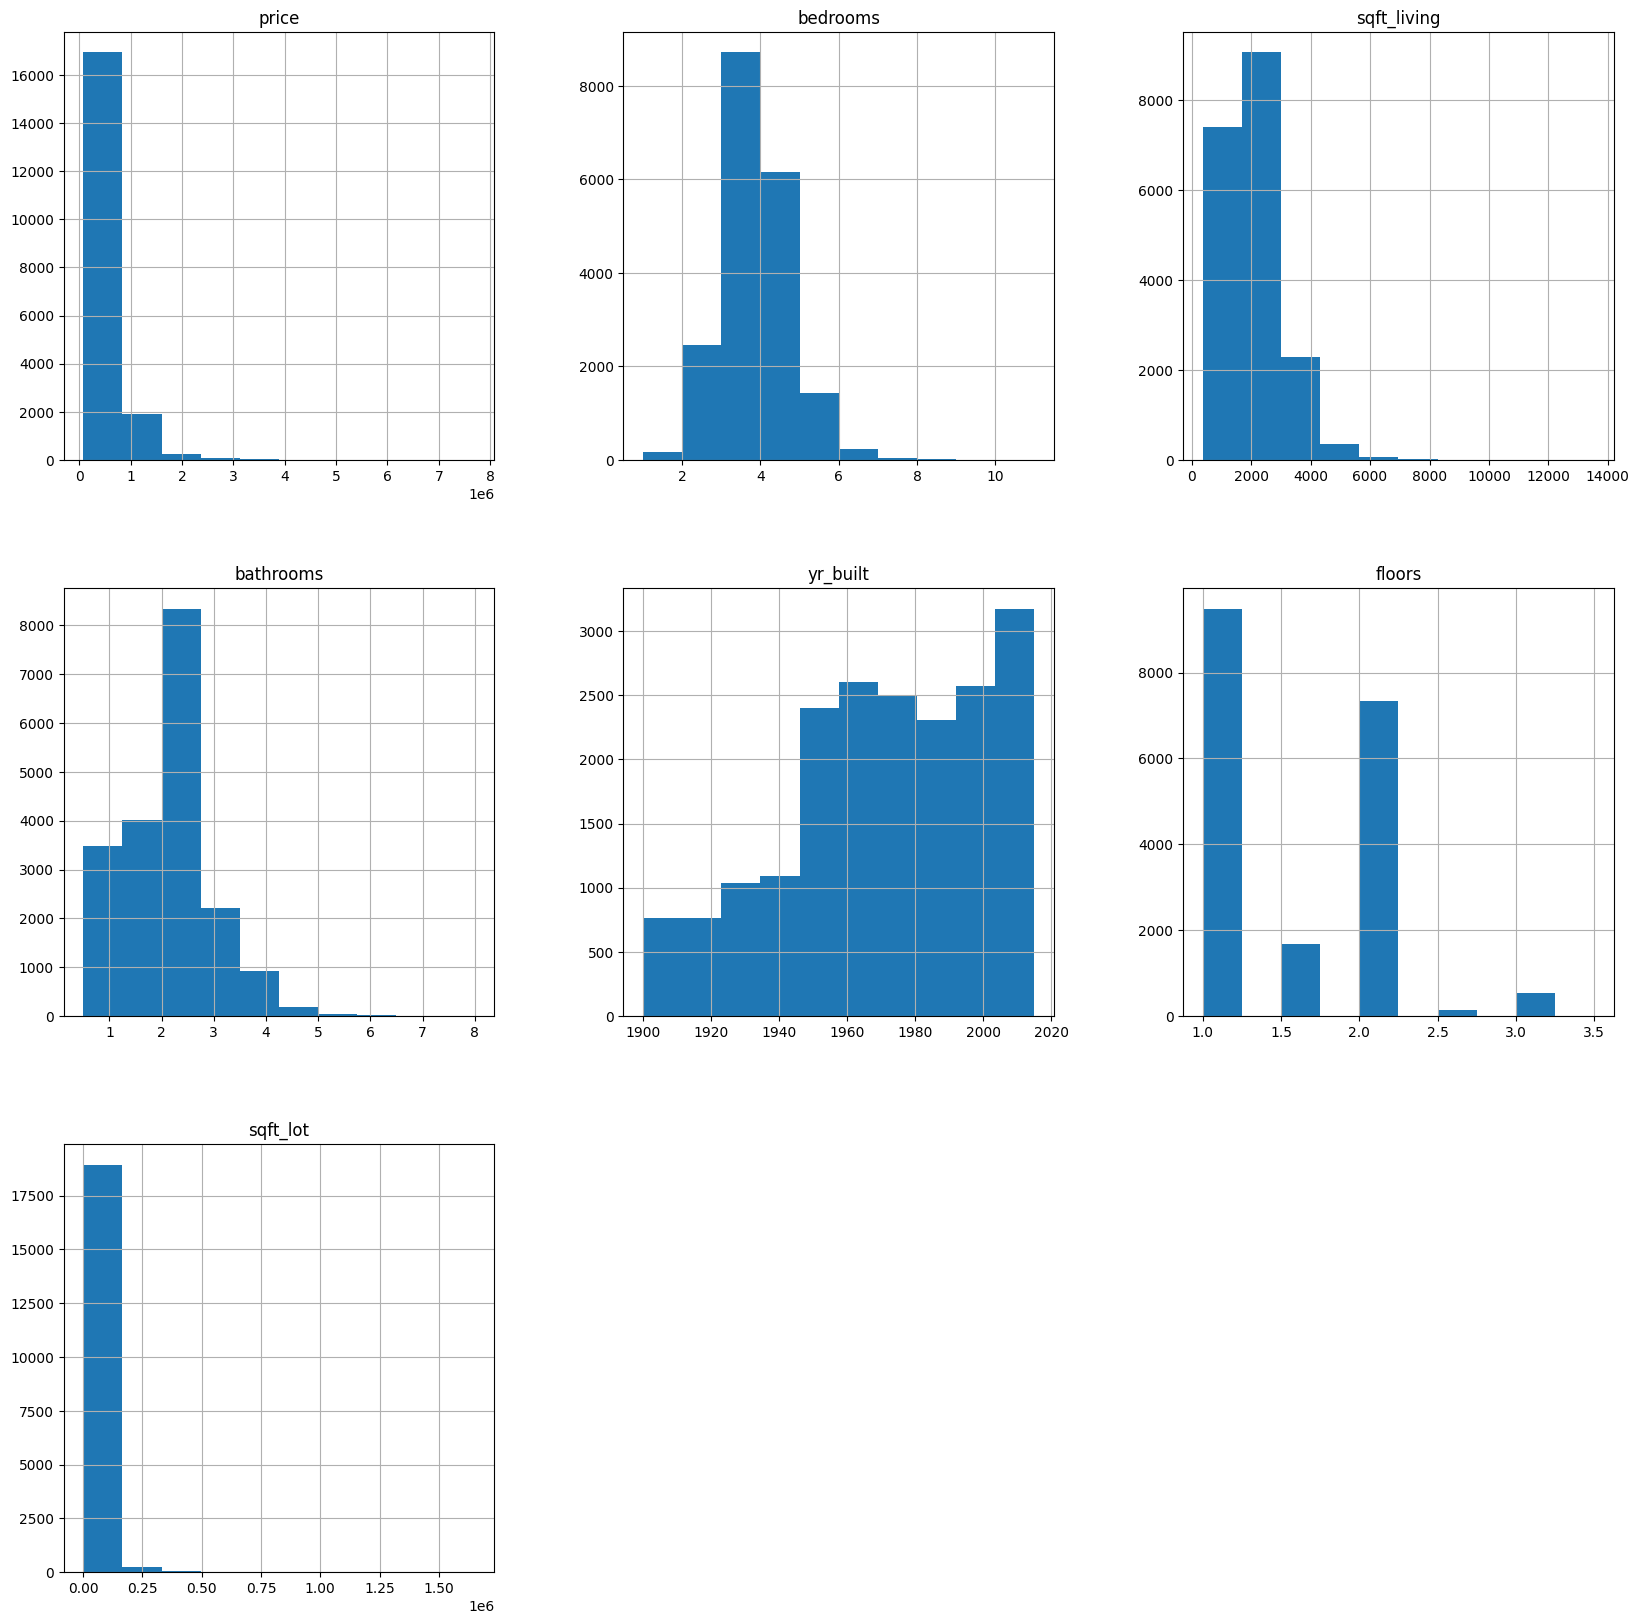

In [1090]:
# Plotting a histogram for the columns in our dataset
df.hist(figsize=(20,20))

In [1091]:
# Checking the values in condition.
df['condition'].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [1092]:
# Replacing the string value with the corresponding integer value (Based on the dataset glossary)
df['condition'] = df['condition'].replace({'Poor': 1, 'Fair': 2, 'Average': 3, 'Good': 4, 'Very Good': 5})
df['condition'].unique()

array([3, 5, 4, 1, 2], dtype=int64)

In [1093]:
#Checking the changes made
df['grade'].unique()

array(['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

In [1094]:
# Extracting the integer from the string
df['grade'] = df['grade'].str.extract('(\d+)', expand=False).astype(int)

# Checking the changes made
df['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13])

In [1095]:
# Replacing the string value with the corresponding integer value (Based on the dataset glossary)
df['waterfront'] = df['waterfront'].replace({'NO': 0, 'YES': 1})
df['waterfront'].unique()

array([0, 1], dtype=int64)

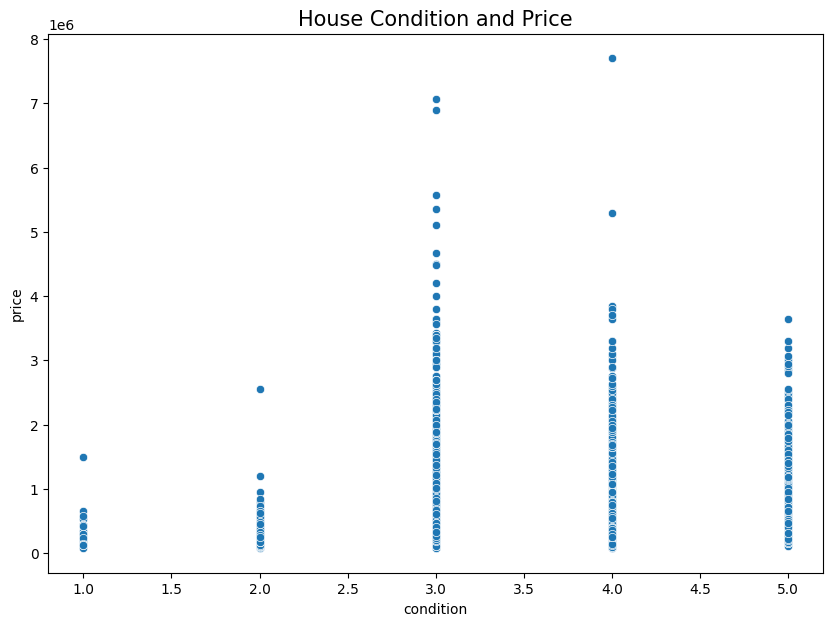

In [1096]:
# Plotting the condition and price
plt.figure(figsize=(10, 7))
sns.scatterplot(x='condition', y='price', data=df)
plt.title('House Condition and Price', fontsize=15)
plt.show()

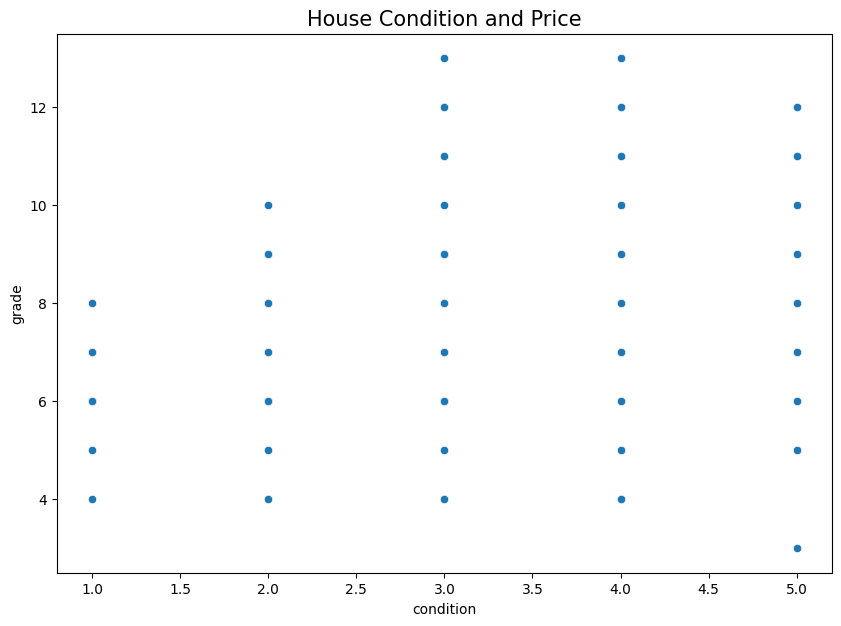

In [1097]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='condition', y='grade', data=df)
plt.title('House Condition and Price', fontsize=15)
plt.show()

In [1098]:
one_hot = pd.get_dummies(df['condition'], drop_first=True) #drop a column to avoid dummy variable trap
new_df = df.drop('condition',axis = 1)
new_df = df.join(one_hot)


<Figure size 640x480 with 0 Axes>

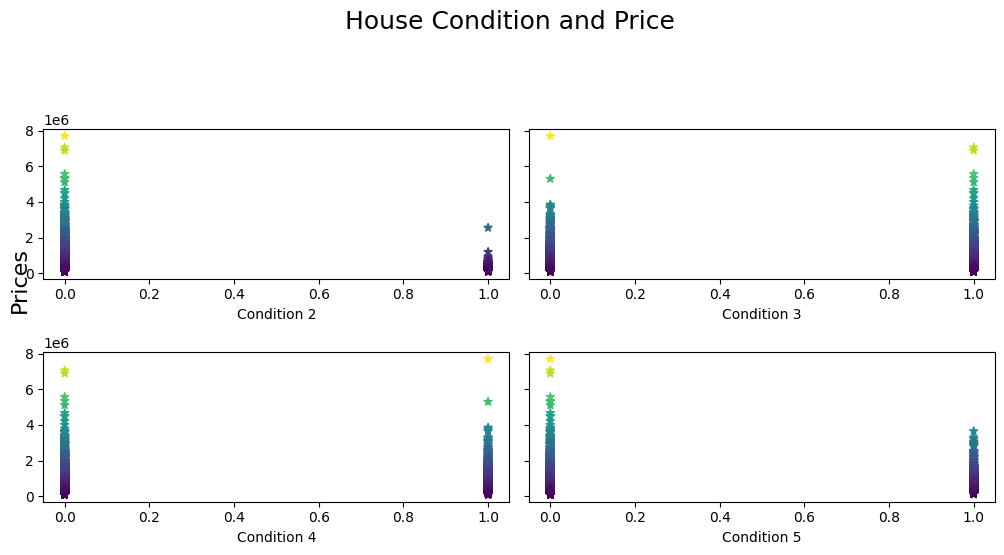

In [1099]:
price = new_df['price']
two = new_df['two'] = new_df[2] 
three = new_df['three'] = new_df[3] 
four = new_df['four'] = new_df[4] 
five = new_df['five'] = new_df[5] 

f = plt.figure()
f, axes = plt.subplots(nrows = 2, ncols = 2, sharex=False, sharey = True, figsize=(10,5))

f.suptitle('House Condition and Price', fontsize=18, y=1.1)
f.text(0.0001, 0.56, 'Prices', va='center', rotation='vertical', fontsize=16)

sc = axes[0][0].scatter(two, price, c = price, marker = "*")
axes[0][0].set_xlabel('Condition 2')

axes[0][1].scatter(three, price, c = price, marker = "*")
axes[0][1].set_xlabel('Condition 3')

axes[1][0].scatter(four, price, c = price, marker = "*")
axes[1][0].set_xlabel('Condition 4')

axes[1][1].scatter(five, price, c = price, marker = "*")
axes[1][1].set_xlabel('Condition 5')


f.tight_layout()
plt.show()

In [1100]:
# Converting the square foot to metres for easier interpretation
conversion_factor = 0.092903
new_df['sqmt_living'] = df['sqft_living'] * conversion_factor
new_df['sqmt_lot'] = df['sqft_lot'] * conversion_factor

new_df['sqmt_living'].head()

1    238.76071
2     71.53531
3    182.08988
4    156.07704
5    503.53426
Name: sqmt_living, dtype: float64

In [1101]:
new_df.columns

Index([      'price',    'bedrooms', 'sqft_living',   'bathrooms',
          'yr_built',      'floors',  'waterfront',   'condition',
             'grade',    'sqft_lot',             2,             3,
                   4,             5,         'two',       'three',
              'four',        'five', 'sqmt_living',    'sqmt_lot'],
      dtype='object')

In [1102]:
new_df.drop(columns=['sqft_lot', 'sqft_living'], inplace=True)

new_df.columns

Index([      'price',    'bedrooms',   'bathrooms',    'yr_built',
            'floors',  'waterfront',   'condition',       'grade',
                   2,             3,             4,             5,
               'two',       'three',        'four',        'five',
       'sqmt_living',    'sqmt_lot'],
      dtype='object')

<Axes: >

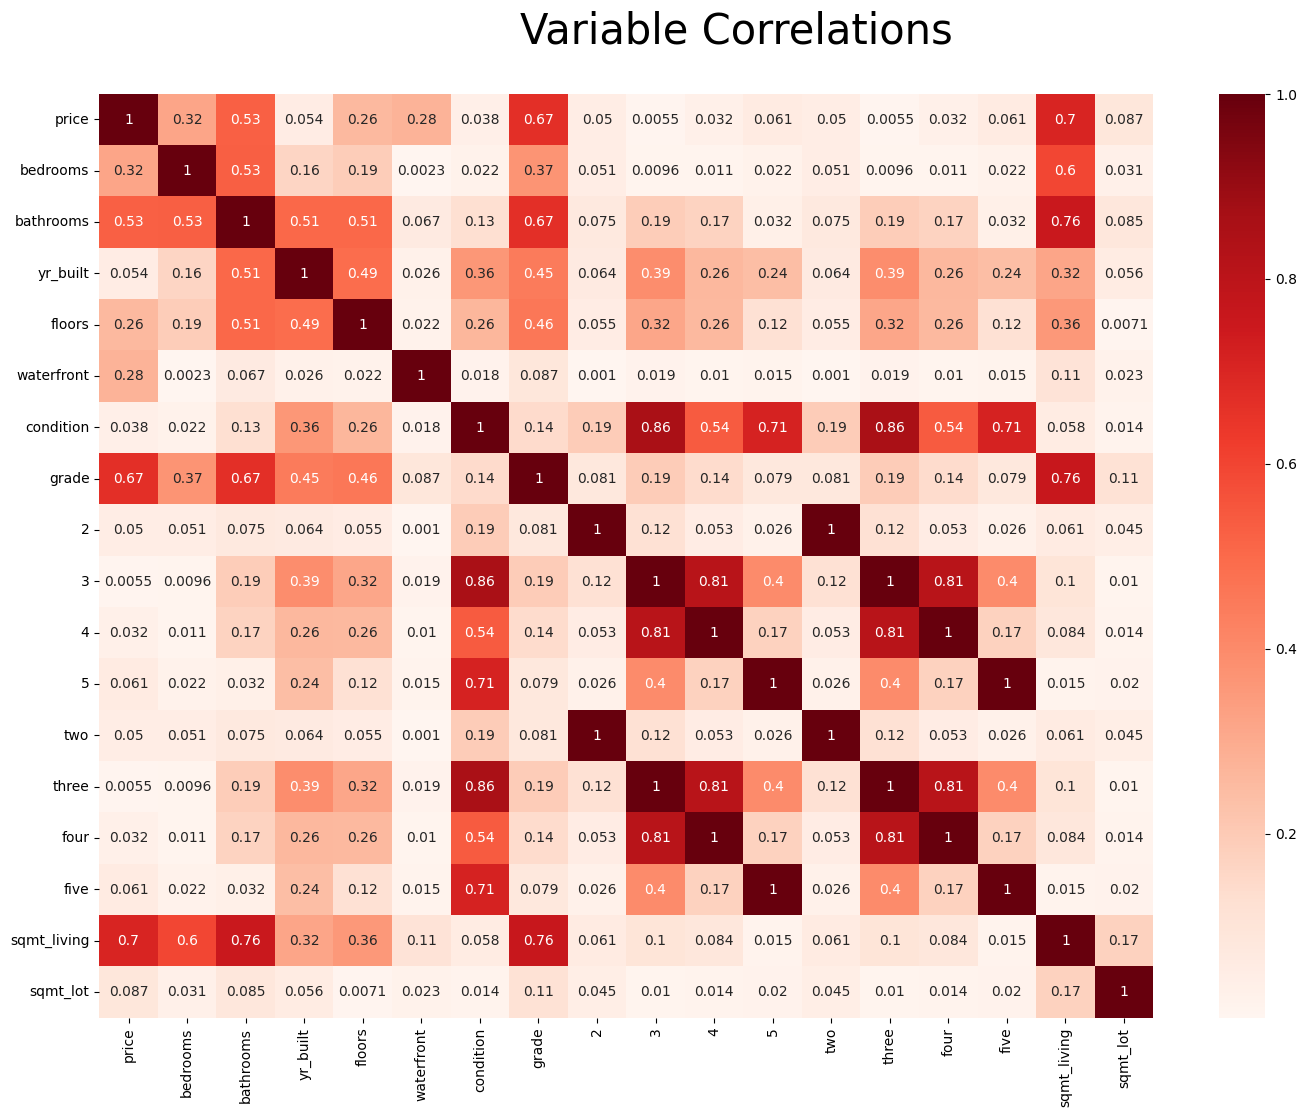

In [1103]:
corr = new_df.corr().abs()
fig, ax=plt.subplots(figsize=(17,12))
fig.suptitle('Variable Correlations', fontsize=30, y=.95)
heatmap = sns.heatmap(corr, cmap='Reds', annot=True)
heatmap

In [1104]:
features = []
correlations = []

# Iterate over the series
for idx in corr.index:
    correlation = corr.loc['price', idx]
    if correlation >= 0.3 and idx != 'price':
        features.append(idx)
        correlations.append(correlation)

# Create DataFrame from the lists
corr_price_df = pd.DataFrame({'Correlations': correlations, 'Features': features}).sort_values(by=['Correlations'], ascending=False)

# Display the DataFrame
print(corr_price_df)

   Correlations     Features
3      0.704689  sqmt_living
2      0.667379        grade
1      0.527391    bathrooms
0      0.317799     bedrooms


# Simple linear regression
We use simple linear regression as our baseline model.


In [1105]:
lr_df = new_df[['price','sqmt_living','grade','bathrooms','bedrooms','waterfront', 'floors','sqmt_lot', 'yr_built', 'condition']]
corr = lr_df.corr()['price'].sort_values(ascending=False)
corr

price          1.000000
sqmt_living    0.704689
grade          0.667379
bathrooms      0.527391
bedrooms       0.317799
waterfront     0.276301
floors         0.258459
sqmt_lot       0.086998
yr_built       0.053607
condition      0.037989
Name: price, dtype: float64

In [1106]:
# We can see that sqmt_living has the highest correlation to the price. 

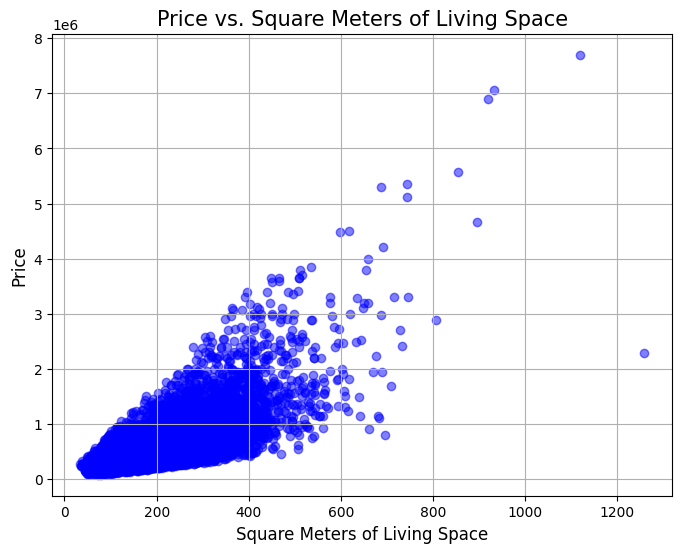

In [1107]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(lr_df['sqmt_living'], lr_df['price'], c='b', alpha=0.5)
plt.title('Price vs. Square Meters of Living Space', fontsize=15)
plt.xlabel('Square Meters of Living Space', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.grid(True)
plt.show()

In [1108]:
# Assigning values for the variables
X = lr_df[['sqmt_living']]
y = lr_df['price']

In [1109]:
baseline_model = sm.OLS(y, sm.add_constant(X))
baseline_results = baseline_model.fit()
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                 1.895e+04
Date:                Tue, 24 Oct 2023   Prob (F-statistic):               0.00
Time:                        23:35:36   Log-Likelihood:            -2.6712e+05
No. Observations:               19213   AIC:                         5.342e+05
Df Residuals:                   19211   BIC:                         5.343e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5.054e+04   4705.059    -10.741      

In [1110]:
y_pred = baseline_results.predict(sm.add_constant(X))
baseline_mae = mean_absolute_error(y, y_pred)
baseline_mae


175092.0783189148

In [1111]:
baseline_rmse = np.sqrt(mean_squared_error(y, y_pred))
baseline_rmse

264157.38150330284

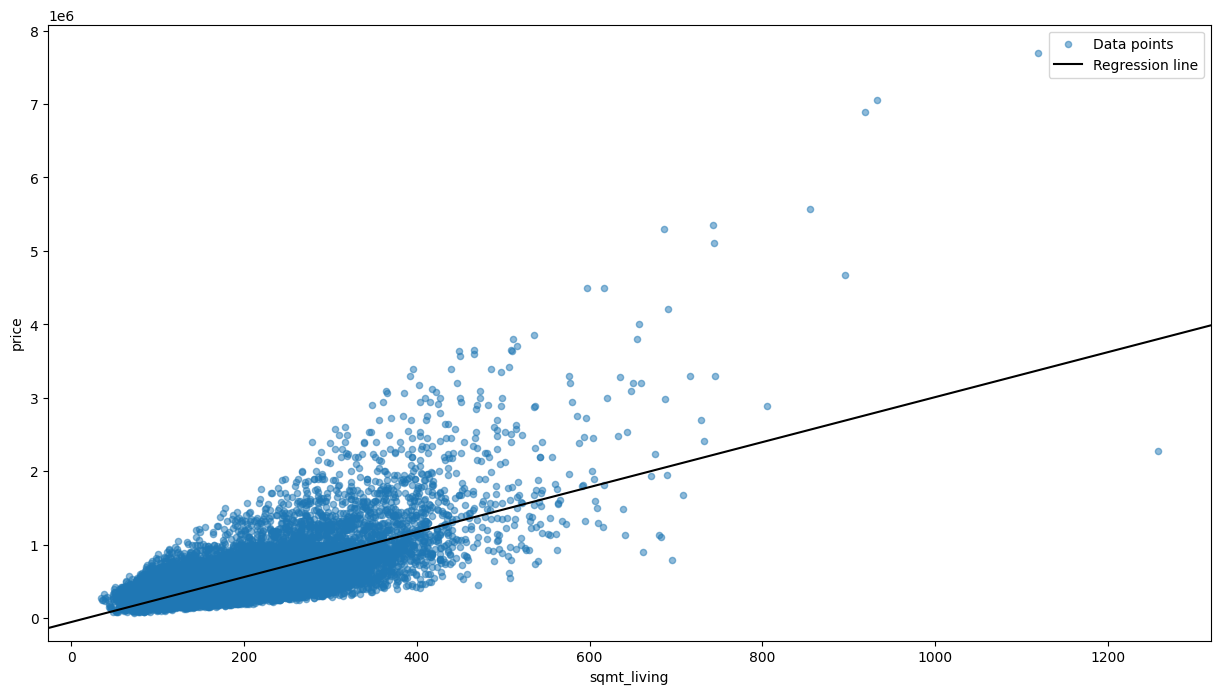

In [1112]:
fig, ax = plt.subplots(figsize=(15,8))
lr_df.plot.scatter(x="sqmt_living", y="price", label="Data points", alpha=0.5 ,ax=ax)
sm.graphics.abline_plot(model_results=baseline_results, label="Regression line", ax=ax, color="black")
ax.legend()

The baseline model, although statistically significant, falls short of our target metrics. It explains approximately 49.7% of the variance in price but has an average error of about $175,092. The significant coefficient for sqm_living indicates that, on average, every additional square meter of living space increases the sale price by $3060. Despite its significance, the baseline model does not meet our goal of an R-squared value of around 70% and a lower mean absolute error.
This will inform our decision to build our multiple linear regression

# Multiple linear regression

In [1113]:
ml_df = df
ml_df.columns

Index(['price', 'bedrooms', 'sqft_living', 'bathrooms', 'yr_built', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_lot'],
      dtype='object')

In [1114]:
ml_df.head()

,price,bedrooms,sqft_living,bathrooms,yr_built,floors,waterfront,condition,grade,sqft_lot
1,538000.0,3,2570,2.25,1951,2.0,0,3,7,7242
2,180000.0,2,770,1.00,1933,1.0,0,3,6,10000
3,604000.0,4,1960,3.00,1965,1.0,0,5,7,5000
4,510000.0,3,1680,2.00,1987,1.0,0,3,8,8080
5,1230000.0,4,5420,4.50,2001,1.0,0,3,11,101930


In [1115]:
price_col = ml_df['price']
ml_df = ml_df.drop('price', axis=1)

# Calculating the correlation matrix
correlation_matrix = ml_df.corr()

# Display the correlation matrix
correlation_matrix

,bedrooms,sqft_living,bathrooms,yr_built,floors,waterfront,condition,grade,sqft_lot
bedrooms,1.000000,0.595024,0.531316,0.163443,0.189291,-0.002311,0.021529,0.371170,0.030570
sqft_living,0.595024,1.000000,0.756400,0.317741,0.357617,0.110223,-0.057504,0.764331,0.173306
bathrooms,0.531316,0.756400,1.000000,0.507089,0.506439,0.067290,-0.126350,0.666935,0.085115
yr_built,0.163443,0.317741,0.507089,1.000000,0.489909,-0.026049,-0.361781,0.446127,0.056040
floors,0.189291,0.357617,0.506439,0.489909,1.000000,0.021938,-0.263241,0.458005,-0.007087
waterfront,-0.002311,0.110223,0.067290,-0.026049,0.021938,1.000000,0.017637,0.087418,0.023132
condition,0.021529,-0.057504,-0.126350,-0.361781,-0.263241,0.017637,1.000000,-0.144318,-0.014161
grade,0.371170,0.764331,0.666935,0.446127,0.458005,0.087418,-0.144318,1.000000,0.114679
sqft_lot,0.030570,0.173306,0.085115,0.056040,-0.007087,0.023132,-0.014161,0.114679,1.000000


In [1120]:
not_highly_correlated = []

# Iterating through the correlation matrix
for col in correlation_matrix.columns:
    for index, value in correlation_matrix[col].items():
        if col != index and abs(value) > 0.8:
            not_highly_correlated.append((col, index))

# Printing the column pairs that are not highly correlated
print(not_highly_correlated)

[]


In [1122]:
mr_model = sm.OLS(price_col, sm.add_constant(ml_df))
mr_results = mr_model.fit()
print(mr_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     3967.
Date:                Tue, 24 Oct 2023   Prob (F-statistic):               0.00
Time:                        23:43:19   Log-Likelihood:            -2.6362e+05
No. Observations:               19213   AIC:                         5.273e+05
Df Residuals:                   19203   BIC:                         5.273e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6.736e+06   1.39e+05     48.602      